In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from Data import Cases, Polygons, Labels
from PImage import PIM
from osgeo import gdal
import h5py

# configure the plot sizes
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
pimObj = PIM(3616, 9)
pimObj.readRGB()

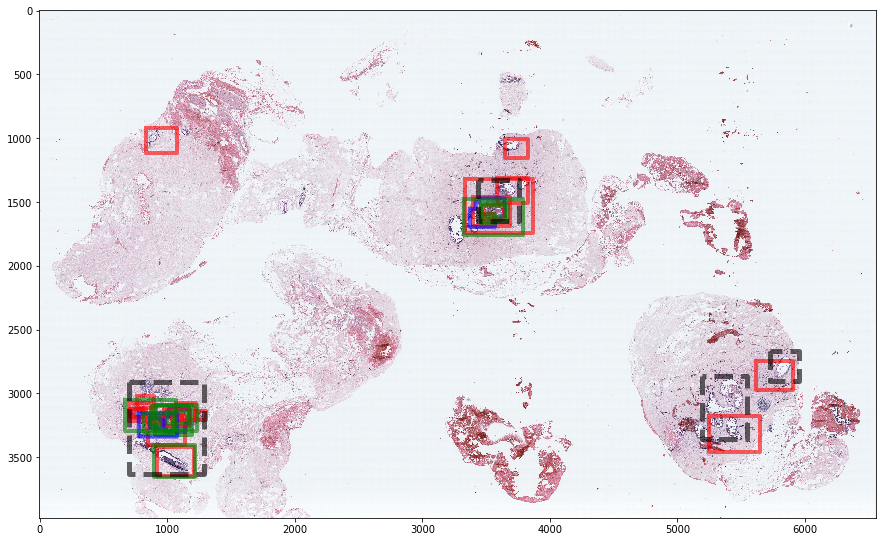

In [21]:
pimObj.showRGB()
pimObj.drawSoftROIs([775,776,777])
pimObj.drawConsensusROIs()
plt.show()

In [22]:
numClasses = 4
for expID, expDiags in pimObj.ExpertDiagnoses.items():
    print(expDiags.print(numClasses), ';', expDiags.diagnoses[numClasses])
print(pimObj.ConsensusDiagnoses.print(numClasses), ';', pimObj.ConsensusDiagnoses.diagnoses[numClasses])

Expert775 Diagnoses: Benign without atypia, DCIS ; [1 0 1 0]
Expert776 Diagnoses: DCIS ; [0 0 1 0]
Expert777 Diagnoses: DCIS ; [0 0 1 0]
Consensus Diagnoses: Benign without atypia, DCIS ; [1 0 1 0]


In [23]:
print(pimObj.ConsensusDiagnoses.print(14))
print(pimObj.ConsensusDiagnoses.diagnoses[14])

Consensus Diagnoses: ColumnarCellHyperplasiaColumnarCellChange, DuctalCarcinomaInSitu
[0 0 0 0 1 0 0 0 0 0 0 1 0 0]


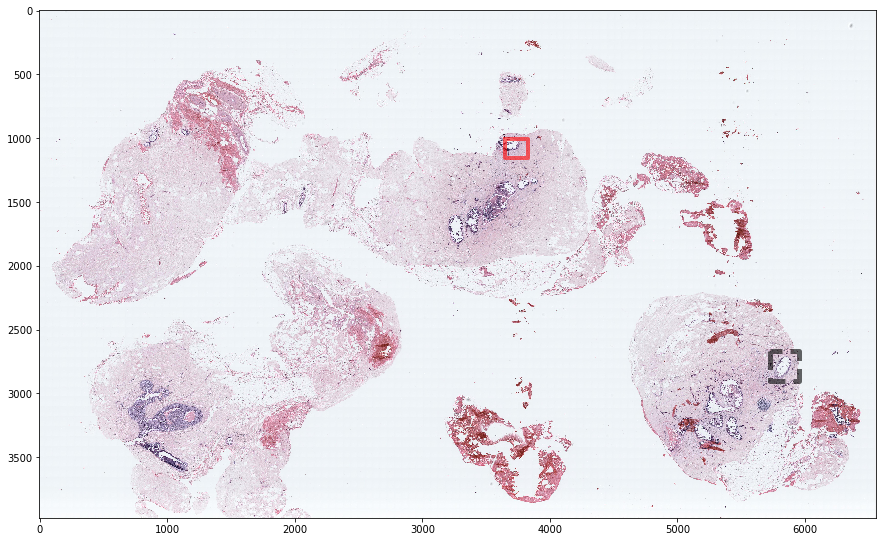

In [24]:
softy = pimObj.SoftROIs[7]
consy = pimObj.ConsensusROIs[0]
pimObj.showRGB()
softy.draw()
consy.draw()
plt.show()

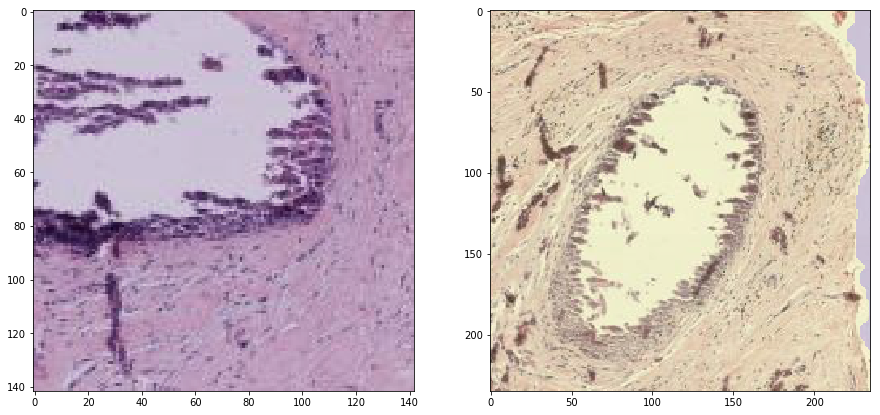

In [25]:
softy_rgb  = softy.readFrom(pimObj.RGB.path)
softy_mask = softy.readFrom(pimObj.FGmask.path)
consy_rgb  = consy.readFrom(pimObj.RGB.path)
consy_mask = consy.readFrom(pimObj.FGmask.path)

f, axs = plt.subplots(1, 2, sharey=False)
axs[0].imshow(softy_rgb,)
axs[0].imshow(softy_mask, alpha=0.2)
axs[1].imshow(consy_rgb,)
axs[1].imshow(consy_mask, alpha=0.2)
plt.show()